# Tarea 10: Sistemas de muchas partículas



**Equipo:**

- Jesús Alberto Teresa Vargas
- Orlando Sánchez Patiño
- Paulina Raquel Martín Cornejo
- Teodora Irene Ortiz Cruz

Esta tarea tiene sólo 2 problemas. Ambos cuentan 5 puntos (aunque aparentemente no tienen la misma dificultad, ambos valen 5 puntos, así que espero que se vea reflejado el esfuerzo, yo (Atahualpa) calificaré el problema 2, no los ayudantes). 

[1] Utiliza el método de celdas para hacer una simulación de 1000 discos duros iguales en una caja con condiciones periódicas a la frontera y obtén la distribución de velocidades de los discos en el tiempo (es decir, haz un gif animado con los histogramas de las velcidades). ¿Obtienes la distribución de velocidades de Boltzmann? Para hacer esta simulación sigue los siguientes pasos: 

1. Considera una partícula puntual con posición $\vec{x}$ y velocidad dada $\vec{v}$ y un disco duro fijo con un radio $2r$ y posición $\vec{c}$ dados. Haz una función que con esa información te arroje true o false si colisiona la partícula con el disco o no y si colisiona te arroja también el punto de colisión $vec{x}_f$ y el tiempo $t_c$ para que esto ocurra, si no te arroja [Inf, Inf] e Inf. Para resolver analíticamente este problema, te conviene escribir la ecuación de la trayectoria de la partícula paramétricamente (en términos del tiempo), de las dos soluciones de la ecuación cuadrática que te saldrá (por la ecuación del círculo), la solución correcta en términos del parámetro es la positiva si la partícula está dentro del círculo y la más pequeña si está fuera del círculo. Si la solución fuera negativa, significa que no hay colisión y debe arrojarse [Inf, Inf] e Inf (pues se trataría de un tiempo negativo). Sólo vamos a usar el caso donde la partícula está fuera del disco, así que puedes sólo quedarte con el parámetro más pequeño. Para hacer un mejor código de esto, conviene que antes de hacer el cálculo, revises si puede haber colisión, es decir, si la proyección de la velocidad de la partícula puntual sobre el vector que une al centro del disco con la partícula es positivo o negativo. Si es positivo entonces no puede haber colisión y puedes arrojar directamente [Inf, Inf] e Inf sin resolver la cuadrática (esto es equivalente a notar que si hubiera colisión, esta sería en un tiempo negativo). Es importante esto último para evitar que una partícula $i$ que acaba de colisionar con otra $j$, en el siguiente paso diga que $i$ y $j$ colisionan en un tiempo $\approx 0$.   

2. Entre 2 discos duros con radios $r_1$ y $r_2$, posiciones dadas $\vec{x}_1$ y $\vec{x}_2$ y velocidades dadas $\vec{v}_2$ y $\vec{x}_2$, puedes calcular el punto de colisión poniendote en el sistema de referencia de uno de los discos duros, de forma que está fijo, luego crecer el radio del disco que está fijo a $R = r_1+r_2$ y decrecer el radio del que se mueve hasta ser un punto. En ese sistema de referencia, la colisión se dará sólo si la partícula puntual colisiona con el disco fijo y si lo hace, esta sucederá cuando el centro del disco movil esté en la posición donde la partícula colisiona. De esta forma, puedes usar la función anterior para obtener la el punto de colisión (es decir, las posiciones de los centros de ambos discos) simplemente cambiando de sistema de coordenadas y luego regresando al sistema original después de la colisión. Haz una función que haga eso, es decir, que dadas los radios, posiciones y velocidades de 2 discos arroje true, las posiciones en el punto de colisión de ambos discos y el tiempo de colisión $t_c$, y false, [Inf,Inf], [Inf,Inf] e Inf si no colisionan. 

3. Escribe las ecuaciones de conservación de energía y momento de los dos discos y con ello calcula las velocidades después de la colisión entre las partículas dadas las posiciones de los centros de las partículas en el punto de colisión, los radios y las velocidades iniciales. Con esto haz una función que dados los radios, posiciones y velocidades de 2 discos, arroje true y las posiciones y velocidades de las partículas justo después de la colisión si estas colisionan y false e [Inf, Inf] y [Inf, Inf] si no colisionan.  

4. Ya puedes simular 2 partículas en el plano, ahora vamos a simular muchas partículas en el plano. Para esto usa el método de celdas, para lo que te conviene hacer tu objeto disco_duro, que incluya entre sus propiedades la masa, velocidad, radio, posición y celda en la que se encuentra. El tamaño de la celda en este caso conviene que sea un poco mayor que un diámetro del disco (van a ser todos iguales, pero si quisieras poner tamaños diferentes, tendría que ser un poco mayor que el disco de mayor tamaño). Para esto requieres definir también una caja donde las partículas estarán, que la puedes definir con la longitud de un cuadrado $L$ o de un rectángulo $L_x$ y $L_y$. Yo re recomiendo que tu caja sea siempre de lado $L = 1$ o en el caso rectangular (que puede ser a veces útil), igual uno de los lados igual a $1$. En ese caso, los radios de las partículas tendrán que ser chiquititos en general. Para hacer las celdas puedes buscar dividir $L$ de tal forma que tengas celdas de lado $l \approx 3r$, donde $l$ es el lado de la celda. Haz una función que dada una $L$, $r$, $m$, un arreglo de posiciones y un arreglo de velocidades, produzca los correspondientes objetos disco_duro, incluyendo sus respectivas celdas.   

5. Ahora necesitamos poder cambiar de celda las partículas al evolucionar el sistema. Haz una función que dadas las posiciones y velocidades de las partículas, encuentre qué partícula sale primero de su respectiva celda y que arroje el índice de la partícula, el tiempo que tarda en salir y la celda a la que entra. 

6. Ahora necesitamos agregar las condiciones a la frontera. Para esto necesitas reconocer qué celdas corresponden a la frontera del sistema. Dado un $L$, haz una función que obtenga las celdas que corresponden a la frontera, además que obtenga si estas celdas son de la frontera inferior, superior, izquera o derecha. Tu función puede por ejemplo regresar una matriz donde los elementos son una tupla de dos números, el primero corresponde a la frontera abajo-arriba y es -1,0 o 1 dependiendo de si la celda en cuestión es una celda de abajo, no es celda ni de arriba ni de abajo, o si es celda de arriba. Similar para el segundo número que sería una celda de frontera izquierda-derecha. Esto lo necesitarás para el siguiente paso. 

7. El siguiente paso es encontrar qué colisión ocurre primero. Para esto usarás el método de celdas. Sobre cada partícula revisarás el tiempo de colisión entre esta y todas las partículas que están en su celda y las 8 celdas de alrededor. Si la celda en la que se encuentra la partícula es una celda de frontera, entonces las celdas con las que revisa deben incluir las de la frontera opuesta, es decir, si es por ejemplo una celda de "arriba", debe incluir 3 celdas de "abajo" (como se muestra en la figura). La función debe arrojar el mínimo tiempo de colisión entre todas las partículas dado el arreglo de discos duros. 

8. Ahora sí, a hacer la función para evolucionar el sistema. Tu función debe calcular primero el tiempo mínimo para cambiar de celda (función del paso 5), después calcular el tiempo mínimo para tener una colisión (paso 7) y de estos tiempos, obtener el mínimo de ellos. Si corresponde a un cambio de celda, simplmente modificar la posición de todas las partículas avanzándolas ese  tiempo mínimo de cambio de celda. Si corresponde a un tiempo de colisión, se avanza a todas las partículas y se modifica la velocidad de las partículas involucradas en la colisión. Haz una función evolucione el sistema un paso, arrojando las nuevas posiciones y velocidades y el tiempo que transcurrió. 

9. Usando la función anteriror haz otra que evolucione el sistema un tiempo $t$. Para esto, aplica la función anterior, cada vez restando a $t$ el tiempo de evolución $t_e$. Cuando se llega a $t<0$, la evolución se detiene y se mueve las partículas un tiempo $t$(que ya es negativo). 

10. Con la función anterior haz una animación de un fluido de discos duros. Te recomiendo comenzar con un arreglo cuadrado (una partícula por celda) y velocidades aleatorias, pero normalizadas. Para evitar que el sistema completo tenga una dirección de movimiento, una vez que hayas asignado una velocidad inicial a todas las partículas, restale a esa velocidad, la velocidad del sistema, es decir, restale a todas las partículas la suma de todas las velocidades. Para cada frame obtén la distribución de velocidades de las partículas, es decir un arreglo con la norma de las velocidades de las partículas. Guarda todos esos arreglos en otro llamado Boltzmann_velocities_distribution

11. Utiliza la paquetería StatsBase para Grafica la evolución de las distribuciones de las velocidades. Puedes hacerlo todas encimadas por colores (que el color cambie con el tiempo usando RGB), o bien hacer un gif animado de la evolución de esta distribución. Requieres la paquetería StatBase, porque no queremos histogramas (con histogram de Plots casi podrías hacerlo), sino curvas, es decir, que con StatBase obtengas los datos que la distribución y con plot grafiques esos datos (abajo pongo un ejemplo de cómo usar StatBase para eso). 

12. ¿Se parece la distribución final de las velocidades a la distribución de Boltzmann de las velocidades? Para verificar trata de ajustar los datos del histograma con la distribución de Boltzmann de las velocidades: $$f(v) ~d^3v = \left(\frac{c}{\pi}\right) \, e^{ -c v^2} ~ d^3v,$$
donde $c$ es una constante que depende de la energía cinética inicial del sistema completo. ç

(pueden revisar aquí: https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution#Relation_to_the_2D_Maxwell%E2%80%93Boltzmann_distribution cómo se debería ver su simulación y las distribuciones en el tiempo)

13. Como extra (esto ya no es necesario que lo hagan), pueden revisar si la distribución se mantiene al ir incrementando el tamaño de los discos (o la densidad). Es bastante difícil llegar **correctamente** a densidades donde el sistema solidifica, pero no es tan difícil acercarse a esos valores comenzando desde un arreglo cuadrado (lo cual es incorrecto, pero no tanto si sólo nos acercamos a los valores de solidificación). 



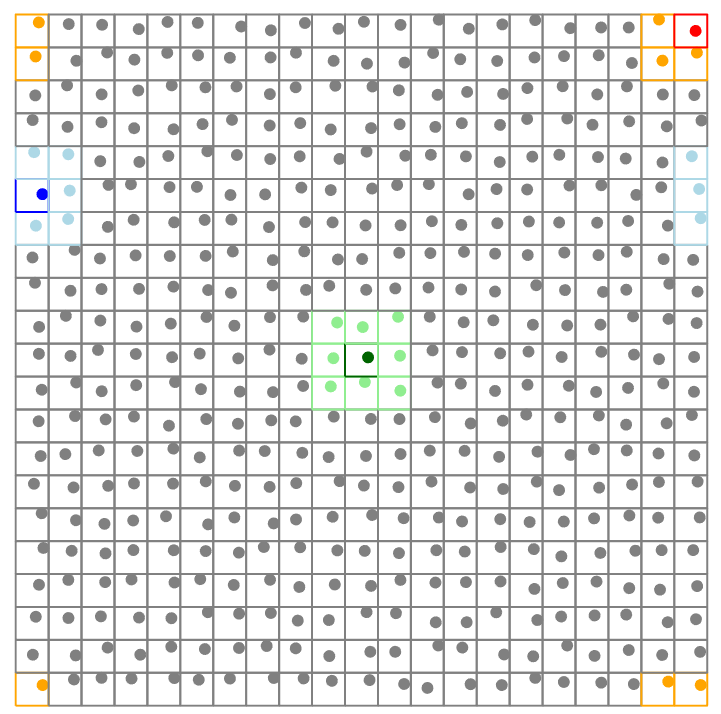

In [1]:
using StatsBase, Plots, LinearAlgebra

In [2]:
include("algebraic_solvers_PaulinaRaquelMartínCornejo-TeodoraIreneOrtizCruz-JesúsAlbertoTeresaVargas-OrlandoSánchezPatiño.jl")

solucionador_biseección_con_adivinanza (generic function with 2 methods)

In [145]:
include("Geometric_structures.jl")
include("particle_disk_dynamics.jl")

Θ (generic function with 4 methods)

In [146]:
# Tal vez se tenga que hacer una estructura llamada celda romboidal
# Faltan los respectivos constructores

In [153]:
rhomboid_per_dims = [20, 3]
rhomboid_diagonal = [1, 1.5]
rectangular_stripe = generate_rectangular_stripe(rhomboid_per_dims, rhomboid_diagonal, [0., 0.])
r_mesh_frontier = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, rectangular_stripe; include_frontier = true)
r_mesh_nofrontier = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, rectangular_stripe, include_frontier = false);

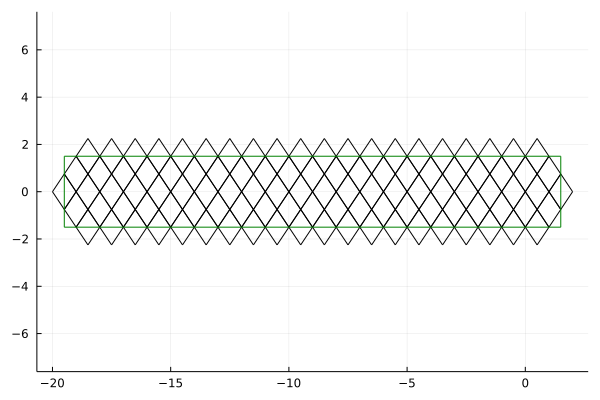

In [154]:
plot(r_mesh_frontier)

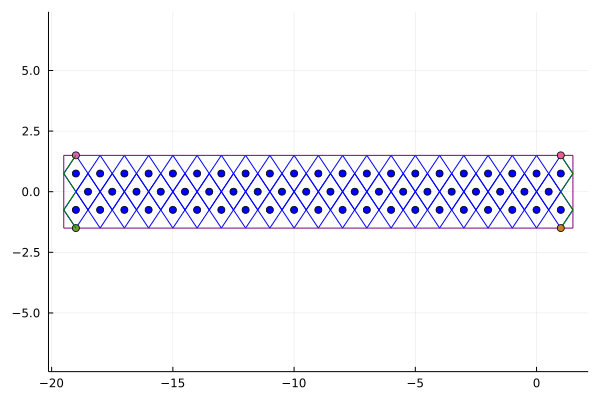

In [155]:
cells = r_mesh_nofrontier.cells;

plot(r_mesh_nofrontier, plot_cell_center = true, color_cell = :blue, color_mesh_shape = :purple)
plot!(cells[1].segments[1]; color = :green)
scatter!(Tuple(cells[2].segments[1].final_point))
scatter!(Tuple(cells[1].segments[2].final_point))
plot!(cells[1].segments[2]; color = :green)
plot!(cells[2].segments[1]; color = :green)
plot!(cells[2].segments[2]; color = :green)
plot!(cells[end].segments[3]; color = :green)
plot!(cells[end].segments[4]; color = :green)
plot!(cells[end-1].segments[3]; color = :green)
scatter!(Tuple(cells[end].segments[4].final_point))
scatter!(Tuple(cells[end-1].segments[3].initial_point))
plot!(cells[end- 1].segments[4]; color = :green)

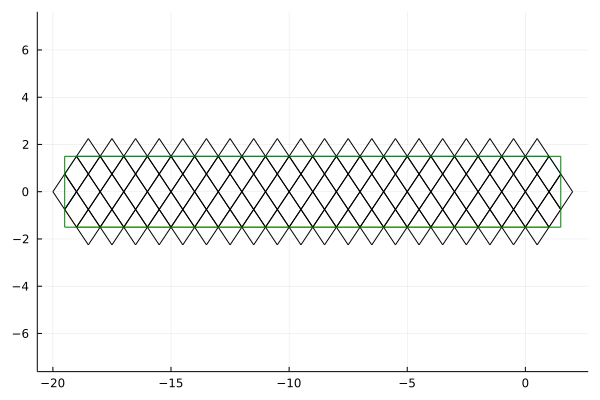

In [157]:
plot!(r_mesh_frontier)

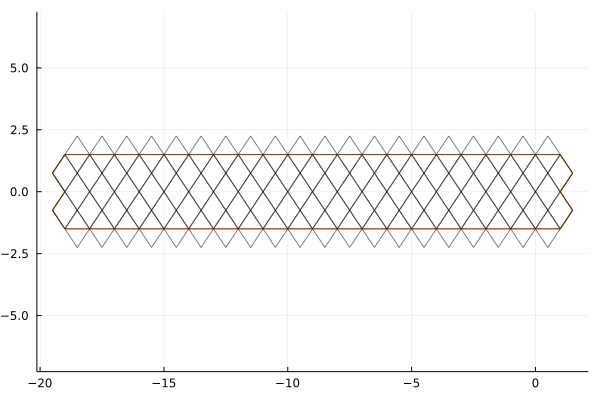

In [164]:
rhomboid_per_dims = [20, 3]
rhomboid_diagonal = [1, 1.5]
frontier_lorentz = generate_frontier_lorentz_gas(rhomboid_per_dims, rhomboid_diagonal; include_frontier = false)
mesh_lorentz = generate_rhomboid_mesh(rhomboid_per_dims, rhomboid_diagonal, frontier_lorentz; include_frontier = true)
plot(frontier_lorentz, ratio = :equal, legend = :false, color = :red)
plot!(mesh_lorentz, alpha = 0.5)

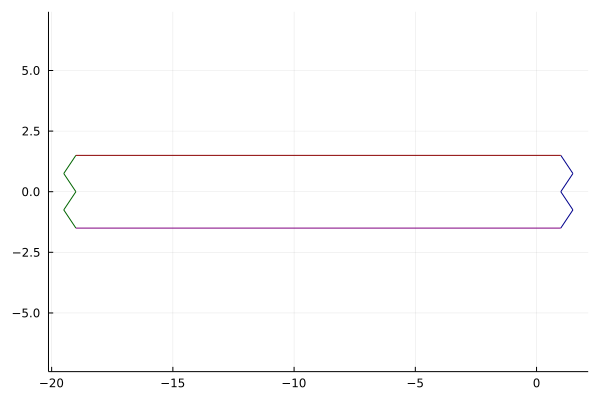

In [165]:
mesh_frontier_lorentz = mesh_frontier(frontier_lorentz)

plot(legend = false, ratio = :equal)
plot!(mesh_frontier_lorentz.left_side, color = :darkgreen)
plot!(mesh_frontier_lorentz.right_side, color = :darkblue)
plot!(mesh_frontier_lorentz.upper_side, color = :darkred)
plot!(mesh_frontier_lorentz.lower_side, color = :purple)

In [167]:
function generate_hard_disks_vector(mass::T1, radius::T1, positions::Vector{Vector{T1}}, angular_velocity::Vector{Vector{T1}}, mesh::Mesh{T2, T1}) where {T1 <: Real, T2 <: Real}
    n = length(positions)
    hard_disks_vec = Vector{Hard_Disk{T1}}(undef, n)
    for i in 1:n
        hard_disk_vec[i] = hard_disk(mass, radius, positions[i], angular_velocity[i], mesh)
    end
    return hard_disk_vec
end

generate_hard_disks (generic function with 1 method)

1. Considera una partícula puntual con posición $\vec{x}$ y velocidad dada $\vec{v}$ y un disco duro fijo con un radio $2r$ y posición $\vec{c}$ dados. Haz una función que con esa información te arroje true o false si colisiona la partícula con el disco o no y si colisiona te arroja también el punto de colisión $vec{x}_f$ y el tiempo $t_c$ para que esto ocurra, si no te arroja [Inf, Inf] e Inf. Para resolver analíticamente este problema, te conviene escribir la ecuación de la trayectoria de la partícula paramétricamente (en términos del tiempo), de las dos soluciones de la ecuación cuadrática que te saldrá (por la ecuación del círculo), la solución correcta en términos del parámetro es la positiva si la partícula está dentro del círculo y la más pequeña si está fuera del círculo. Si la solución fuera negativa, significa que no hay colisión y debe arrojarse [Inf, Inf] e Inf (pues se trataría de un tiempo negativo). Sólo vamos a usar el caso donde la partícula está fuera del disco, así que puedes sólo quedarte con el parámetro más pequeño. Para hacer un mejor código de esto, conviene que antes de hacer el cálculo, revises si puede haber colisión, es decir, si la proyección de la velocidad de la partícula puntual sobre el vector que une al centro del disco con la partícula es positivo o negativo. Si es positivo entonces no puede haber colisión y puedes arrojar directamente [Inf, Inf] e Inf sin resolver la cuadrática (esto es equivalente a notar que si hubiera colisión, esta sería en un tiempo negativo). Es importante esto último para evitar que una partícula $i$ que acaba de colisionar con otra $j$, en el siguiente paso diga que $i$ y $j$ colisionan en un tiempo $\approx 0$. 

Como no hay fuierzas externas, la particula puntual llevara a cabo un movimiento rectilineo uniforme. Este problema puede resolverse de dos maneras disitntas. La primera es sustituir las ecuaciones de movimento de la partícula en la ecuación de la circunferencia y encontrar las soluciones correspondientes con la fórmula general para encontrar raíces de un polinomio cuadrático. Este primer método permite encontrar soluciones analíticamente. La segunda manera consiste en igualar, entrada a a entrada, las ecuaciones de movimiento de la partícula con las ecuaciones paramétricas de la circunferencia. Una posible desventaja de este enfoque es que la busqueda de la solución no es analítica y debe encontrarse con algún método numérico como el método de Newton.

A continuación se implementarán ambas ideas:

Dada la ecuaci[

### (i) Método I

La ecuación de la circunferencia con centro $\vec c = (c_x, c_y)$ es 

$$ (x - c_x)^2 + (y - c_y)^2 = r^2. $$

Sustituyendo las ecuaciones de movimiento de la partícula en la ecuación de la circunferencia llegamos a que

$$ (v_x t + x_0 - c_x)^2 + (v_y t + y_0 - c_y)^2 = r^2) $$

$$ \Rightarrow (v_x t + x_0)^2 - 2(v_x t + x_0)c_x + c_x^2 + (v_y t + y_0)^2 - 2(v_y t + y_0)c_y + c_y^2 = r^2 $$

$$ \Rightarrow v^2_x t^2 + 2 v_x x_0 t + x^2_0 - 2v_x c_x t - 2x_0 c_x + c_x ^2 + v^2_y t^2 + 2 v_y y_0 t + y^2_0 - 2v_y c_y t- 2y_0 c_y + c_y^2= r^2$$

Agrupando términos llegamos a que

$$ (v^2_x + v^2_y) t^2 + (2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y) t + (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2) = 0 $$

donde $a = v^2_x + v^2_y$, $b = 2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y $  y  $c = x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2$.

Por lo que las soluciones dadas por la fórmula general son

$$ t = \dfrac{- 2(v_x x_0 - v_x c_x + v_y y_0 - v_y c_y) \pm \sqrt{4( v_x x_0 - v_x c_x + v_y y_0 - v_y c_y)^2 - 4 (v^2_x + v^2_y) (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2)}}{2 (v^2_x + v^2_y)}  $$

$$ \Rightarrow t = \dfrac{- 2(v_x x_0 - v_x c_x + v_y y_0 - v_y c_y) \pm 2\sqrt{( v_x x_0 - v_x c_x + v_y y_0 - v_y c_y)^2 -  (v^2_x + v^2_y) (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2)}}{2 (v^2_x + v^2_y)}  $$

$$ \Rightarrow t = \dfrac{- (v_x x_0 - v_x c_x + v_y y_0 - v_y c_y) \pm \sqrt{( v_x x_0 - v_x c_x + v_y y_0 - v_y c_y)^2 -  (v^2_x + v^2_y) (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2)}}{ (v^2_x + v^2_y)}  $$


$$ (v^2_x + v^2_y) t^2 + (2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y) t + (x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- 4 r^2) = 0 $$

donde $$a = v^2_x + v^2_y$$, $$b = 2 v_x x_0 - 2 v_x c_x + 2 v_y y_0 - 2v_y c_y $$  y  $$c = x^2_0 + y^2_0 + c_x^2 + c_y^2 - 2x_0c_x - 2 y_0 c_y- r^2$$.

In [12]:
function select_time(t::Vector{T}) where T <: Real
    if t[1] < 0 && t[2] < 0
        return error("The system does not have a physical solution for the specified collision. The solutions obtained account for negative times.")
    
    elseif t[1] > 0 && t[2] > 0
        t_c = findmin(t)[1]
        return t_c
        
    elseif (t[1] < 0 || t[2] < 0) || (t[1] > 0 || t[2] > 0) # Para hacer este caso mas especifico podria agregarse una condicion adicional: & !(t[1] < 0 && t[2] < 0)
        index = findfirst(x -> x > 0, t)
        t_c = t[index]
        return t_c
   
    elseif t[1] == 0 && t[2] == 0
        return error("The collision occurred at the initial time.")
    
    else
        return error("This function only receives a two-dimensional vector.")
    end
end

select_time (generic function with 1 method)

In [13]:
function particle_disk_collision(disk::Hard_Disk{T}, particle::Particle{T}, method::Val{:method1}) where {T <: Real}
    (; mass, position, angular_velocity, radius, cell) = disk
    disk_position, disk_angular_velocity, disk_radius = position, angular_velocity, radius
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    particle_mass, particle_position, particle_velocity, particle_normal_velocity, particle_tangential_velocity = mass, position, velocity, normal_velocity, tangential_velocity
    
    disk_particle_vec = particle_position - disk_position # vector que une al centro del disco con la particula
    proj = projection(particle_velocity, disk_particle_vec) #proyeccion de la velocidad sobre el vector previamente definido
    
    if proj < 0 # Hay colision y no se empalman
        # Ecuacion general
        a = particle_velocity[1]^2 + particle_velocity[2]^2
        b = 2 * (particle_velocity[1] * particle_position[1] - particle_velocity[1] * disk_position[1] + particle_velocity[2] * particle_position[2] - particle_velocity[2] * disk_position[2])
        c = particle_position[1]^2 + particle_position[2]^2 + disk_position[1]^2 + disk_position[2]^2 - 2 * particle_position[1] * disk_position[1] - 2 * particle_position[2] * disk_position[2] - disk_radius^2
        t1_sol = (-b + sqrt(b^2 - 4 * a * c)) / (2 * a)
        t2_sol = (-b - sqrt(b^2 - 4 * a * c)) / (2 * a)
        t_sol = [t1_sol, t2_sol]
        t_collision = select_time(t_sol)
        𝑣𝑒𝑐𝑥𝑓 =  [x_particle(particle_position, particle_velocity, t_collision), y_particle(particle_position, particle_velocity, t_collision)]
        return true, 𝑣𝑒𝑐𝑥𝑓, t_collision
    
    elseif proj > 0 # No hay colision y no se empalman
        return false, [Inf, Inf], Inf
        
    else
        return "La proyeccion es cero"
    end
    
end

particle_disk_collision (generic function with 1 method)

In [14]:
particle_disk_collision(disk::Hard_Disk{T}, particle::Particle{T}, method::Symbol) where T <: Real = particle_disk_collision(disk, particle, Val(method))

particle_disk_collision (generic function with 2 methods)

3. Escribe las ecuaciones de conservación de energía y momento de los dos discos y con ello calcula las velocidades después de la colisión entre las partículas dadas las posiciones de los centros de las partículas en el punto de colisión, los radios y las velocidades iniciales. Con esto haz una función que dados los radios, posiciones y velocidades de 2 discos, arroje true y las posiciones y velocidades de las partículas justo después de la colisión si estas colisionan y false e [Inf, Inf] y [Inf, Inf] si no colisionan.  

In [15]:
# Probando la funcion η
p_mass = 1.
d_radius = 0.5
eta = η(Θ, p_mass, d_radius)

0.5

In [16]:
function particle_disk_collision_dynamics(disk::Hard_Disk{T}, particle::Particle{T}; method::Symbol = :method1, coord::Symbol = :z) where {T <: Real} # _1 for disk, _2 for particle
    (; mass, position, angular_velocity, radius, cell) = disk
    disk_position, disk_angular_velocity, disk_radius = position, angular_velocity, radius
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    particle_mass, particle_position, particle_velocity, particle_normal_velocity, particle_tangential_velocity = mass, position, velocity, normal_velocity, tangential_velocity
    collision = particle_disk_collision(disk, particle, method)[1:3]
    
    if collision[1]
        eta = η(Θ, particle_mass, disk_radius; coord = coord) # moment of inertia, mass of the particle, 
        α = (2 / (1 + eta)) .* (particle_tangential_velocity .- (disk_radius .* disk_angular_velocity))
        particle_normal_velocity_f = - particle_normal_velocity
        particle_tangential_velocity_f = particle_tangential_velocity .- (eta * α) 
        particle_velocity_f = particle_normal_velocity_f .+ particle_tangential_velocity_f
        disk_angular_velocity_f = ((disk_radius .* disk_angular_velocity) .+ α) ./ disk_radius
        return collision[1], collision[2], collision[3], particle_velocity_f, disk_angular_velocity_f
    else
        return collision
    end
end

particle_disk_collision_dynamics (generic function with 1 method)

The angular velocity $\omega$ is the rate of change of angular position with respect to time, which can be computed from the cross-radial velocity as:
$$
\omega=\frac{d \phi}{d t}=\frac{v_{\perp}}{r} .
$$

Here the cross-radial speed $v_{\perp}$ is the signed magnitude of $\mathbf{v}_{\perp}$, positive for counter-clockwise motion, negative for clockwise. Taking polar coordinates for the linear velocity $\mathbf{v}$ gives magnitude $v$ (linear speed) and angle $\theta$ relative to the radius vector; in these terms, $v_{\perp}=v \sin (\theta)$, so that
$$
\omega=\frac{v \sin (\theta)}{r}
$$.

In [17]:
scatter(Tuple(disk_position))
plot!(r_mesh_frontier)

LoadError: UndefVarError: disk_position not defined

In [18]:
# Caso patologico
disk_radius = 2.
disk_position = [1., 1.]
disk_angular_velocity = tangential_velocity([-1., 0.]) ./ disk_radius
particle_position = [-1., -1.]
particle_velocity = [1., 0.]
particle_disk_collision_dynamics(disk_radius, disk_position, disk_angular_velocity, particle_position, particle_velocity)

LoadError: MethodError: no method matching particle_disk_collision_dynamics(::Float64, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64})

In [19]:
disk_radius = 1.1
disk_position = [1., 0]
disk_angular_velocity = tangential_velocity([-1., 0.]) ./ disk_radius
particle_position = [-1, 0.]
particle_velocity = [1., 0]
particle_disk_collision_dynamics(disk_radius, disk_position, disk_angular_velocity, particle_position, particle_velocity)

LoadError: MethodError: no method matching particle_disk_collision_dynamics(::Float64, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64})

In [20]:
disk_radius = 1.1
disk_position = [2., 0.]
disk_angular_velocity = tangential_velocity([-1.,0.]) ./ disk_radius
particle_position = [-2, 0.]
particle_velocity = [1., 0]
disk1 = hard_disk(1., disk_radius, disk_position, disk_angular_velocity, r_mesh_frontier)
particle1 = particle(1., particle_position, particle_velocity, r_mesh_frontier)
##find_cell(disk_position, r_mesh_frontier)
particle_disk_collision_dynamics(disk1, particle1)

(true, [0.8999999999999995, 0.0], 2.8999999999999995, [-0.33333333333333326, 0.0], [1.515151515151515, 0.0])

In [21]:
disk_radius = 1.
disk_position = [0., 0]
disk_angular_velocity = tangential_velocity([-1., 0.]) ./ disk_radius
particle_position = [-1., 0.]
particle_velocity = [1., 0]
particle_disk_collision_dynamics(disk_radius, disk_position, disk_angular_velocity, particle_position, particle_velocity)

LoadError: MethodError: no method matching particle_disk_collision_dynamics(::Float64, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64})

In [22]:
disk_radius = 1.1
disk_position = [0., 0]
disk_angular_velocity = tangential_velocity([-1., 0.]) ./ disk_radius
particle_position = [-1., 0.]
particle_velocity = [1., 0]
particle_disk_collision_dynamics(disk_radius, disk_position, disk_angular_velocity, particle_position, particle_velocity)

LoadError: MethodError: no method matching particle_disk_collision_dynamics(::Float64, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64})

In [23]:
include("particle_disk_dynamics.jl")

Θ (generic function with 4 methods)

In [24]:
zero([1.0, 0.])

2-element Vector{Float64}:
 0.0
 0.0

In [25]:
zero(disk1)

LoadError: MethodError: no method matching Hard_Disk(::Float64, ::Float64, ::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Int64)
[0mClosest candidates are:
[0m  Hard_Disk(::T, ::T, ::Vector{T}, ::Vector{T}, [91m::Int64[39m) where T<:Real at C:\Users\pauli\Downloads\particle_disk_dynamics.jl:6

4. Ya puedes simular 2 partículas en el plano, ahora vamos a simular muchas partículas en el plano. Para esto usa el método de celdas, para lo que te conviene hacer tu objeto disco_duro, que incluya entre sus propiedades la masa, velocidad, radio, posición y celda en la que se encuentra. El tamaño de la celda en este caso conviene que sea un poco mayor que un diámetro del disco (van a ser todos iguales, pero si quisieras poner tamaños diferentes, tendría que ser un poco mayor que el disco de mayor tamaño). Para esto requieres definir también una caja donde las partículas estarán, que la puedes definir con la longitud de un cuadrado $L$ o de un rectángulo $L_x$ y $L_y$. Yo re recomiendo que tu caja sea siempre de lado $L = 1$ o en el caso rectangular (que puede ser a veces útil), igual uno de los lados igual a $1$. En ese caso, los radios de las partículas tendrán que ser chiquititos en general. Para hacer las celdas puedes buscar dividir $L$ de tal forma que tengas celdas de lado $l \approx 3r$, donde $l$ es el lado de la celda. Haz una función que dada una $L$, $r$, $m$, un arreglo de posiciones y un arreglo de velocidades, produzca los correspondientes objetos disco_duro, incluyendo sus respectivas celdas.

5. Ahora necesitamos poder cambiar de celda las partículas al evolucionar el sistema. Haz una función que dadas las posiciones y velocidades de las partículas, encuentre qué partícula sale primero de su respectiva celda y que arroje el índice de la partícula, el tiempo que tarda en salir y la celda a la que entra.  

Este inciso puede implementarse de varias maneras. Una de ellas es encontrando la intersección de una particula con la frontera de la celda. Para ello, es necesario encontrar primero la intersección de un punto con un segmento, y luego de un punto con un conjunto de segmentos. Esta interseccion puede calcularse de forma analitica o de forma numerica. Esto se puede hacer con las funciones `point_on_segment` y `point_on_polygon_frontier`. O bien, el enfoque que se adoptará será el de encontrar la intersección entre dos rectas.

Las ecuaciones para el movimiento rectilíneo uniforme de una particula con posición incial $\vec{x_0}$ y  velocidad $\vec{v}$ son:

$$ x(t) = x_0 + v_x t $$
$$ y(t) = y_0 + v_y t. $$

Por otra parte, dado un segmento con puntos incial y final, $\vec{x_i}$ y $\vec{x_f}$ respectivamente, las ecuaciones paramétricas correspondientes son:

$$ x(t) = x_i + (x_f - x_i) t $$
$$ y(t) = y_i + (y_f - y_i) t. $$

Igualando ambas ecuaciones obtenemos 

$$ x_0 + v_x t = x_i + (x_f - x_i) t $$
$$ y_0 + v_y t = y_i + (y_f - y_i) t $$,

$$ (x_0 - x_i) + (v_x - x_f + x_i) t = 0 $$
$$ (y_0 - y_i) + (v_y - y_f + y_i) t = 0 $$,

Por tanto, 

$$ t_x = \dfrac{x_i - x_0}{v_x - x_f + x_i} $$
$$ t_y = \dfrac{y_i - y_0}{v_y - y_f + y_i}. $$

Notamos que si $t_i < 0$ $p.a.$ $i$, entonces esa opción debe descartarse pues indica que la colisión entre la particula y el segmento ocurre para tiempos negativos, lo cual implica que la particula tuvo que haber colisionado previamente con ese segmento, o bien, que la velocidad de la particula debe tener sentido contrario alq ue presenta en ese momento para que la colisión pueda ocurrir.

In [26]:
function particle_segment_intersection(particle::Particle{T}, segment::Segment{T}) where T <: Real
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    t = [vector_segment_intersection(velocity, position, segment, s) for s in [:x, :y]]
    t_intersection = select_time(t)
end

particle_segment_intersection (generic function with 1 method)

In [27]:
s0 = segment([0, -1.], [0., 1.])
particle0 = particle(2., [0., 0.], [1., 0.], r_mesh_frontier)
particle_segment_intersection(particle0, s0)

0.5

In [28]:
particle1 = particle(2., [-1., 0.], [1., 0.], r_mesh_frontier)
particle_segment_intersection(particle1, s0)

0.5

In [29]:
particle2 = particle(2., [-1., 0.], [1., -5], r_mesh_frontier)
particle_segment_intersection(particle2, s0)

0.14285714285714285

In [30]:
particle_segment_intersection(particle2, r_mesh_frontier.cells[35].segments[1])

LoadError: The collision occurred at the initial time.

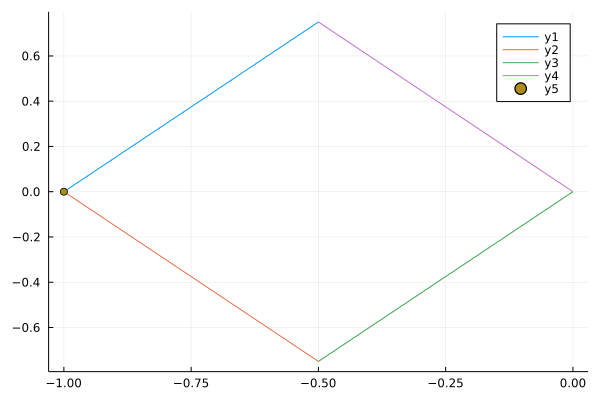

In [31]:
plot(r_mesh_frontier.cells[35])
scatter!(Tuple(particle1.position))

In [32]:
rhomboid1 = rhomboid([1., 1.], particle1.position, :vertical)

Rhomboid{Float64}([1.0, 1.0], [[-1.5, 0.0], [-1.0, -0.5], [-0.5, 0.0], [-1.0, 0.5]], Segment{Float64}[Segment{Float64}([-1.5, 0.0], [-1.0, 0.5], 0.7071067811865476), Segment{Float64}([-1.5, 0.0], [-1.0, -0.5], 0.7071067811865476), Segment{Float64}([-1.0, -0.5], [-0.5, 0.0], 0.7071067811865476), Segment{Float64}([-0.5, 0.0], [-1.0, 0.5], 0.7071067811865476)], [-1.0, 0.0])

In [33]:
rhomboid1.segments[1]

Segment{Float64}([-1.5, 0.0], [-1.0, 0.5], 0.7071067811865476)

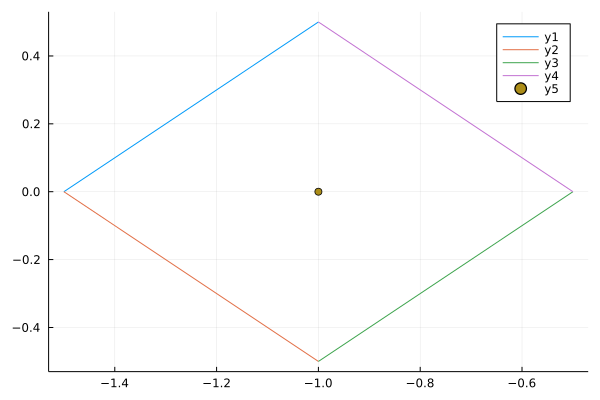

In [34]:
plot(rhomboid1)
scatter!(Tuple(particle1.position))

In [35]:
particle_segment_intersection(particle1, rhomboid1.segments[4])

0.3333333333333333

In [36]:
vector_segment_intersection(particle1.velocity, particle1.position, rhomboid1.segments[4], :x)

0.3333333333333333

In [37]:
particle_segment_intersection(particle1, rhomboid1.segments[4])

0.3333333333333333

In [38]:
segment([0., 0.], [0., 0.])

Segment{Float64}([0.0, 0.0], [0.0, 0.0], 0.0)

In [39]:
function particle_polygon_frontier_intersection(particle::Particle{T}, polygon::Rhomboid{T}) where T <: Real
    (; mass, position, velocity, normal_velocity, tangential_velocity, cell) = particle
    (; diagonal, vertices, segments, center) = polygon
    min_intersection = (Inf, segment([0., 0.], [0., 0.]))
    for (i, segment) in enumerate(segments) 
        try
            t = particle_segment_intersection(particle, segment)
            if t < min_intersection[1]
                min_intersection = (t, segment)
            end
        catch e
            continue
        end
    end
       
    return min_intersection
end

particle_polygon_frontier_intersection (generic function with 1 method)

In [40]:
particle_polygon_frontier_intersection(particle1, rhomboid1)

(0.3333333333333333, Segment{Float64}([-0.5, 0.0], [-1.0, 0.5], 0.7071067811865476))

In [41]:
rhomboid1 = rhomboid([1, 1.], particle1.position, :vertical)

Rhomboid{Float64}([1.0, 1.0], [[-1.5, 0.0], [-1.0, -0.5], [-0.5, 0.0], [-1.0, 0.5]], Segment{Float64}[Segment{Float64}([-1.5, 0.0], [-1.0, 0.5], 0.7071067811865476), Segment{Float64}([-1.5, 0.0], [-1.0, -0.5], 0.7071067811865476), Segment{Float64}([-1.0, -0.5], [-0.5, 0.0], 0.7071067811865476), Segment{Float64}([-0.5, 0.0], [-1.0, 0.5], 0.7071067811865476)], [-1.0, 0.0])

In [42]:
particle2 = particle(2., [-2., 0.], [1, 1.], r_mesh_frontier)

Particle{Float64}(2.0, [-2.0, 0.0], [1.0, 1.0], [-7.850462293418875e-17, 7.850462293418876e-17], [1.0, 1.0], 25)

In [43]:
particle_polygon_frontier_intersection(particle2, rhomboid1)

(1.0, Segment{Float64}([-1.5, 0.0], [-1.0, 0.5], 0.7071067811865476))

Ahora necesitamos poder cambiar de celda las partículas al evolucionar el sistema. Haz una función que dadas las posiciones y velocidades de las partículas, encuentre qué partícula sale primero de su respectiva celda y que arroje el índice de la partícula, el tiempo que tarda en salir y la celda a la que entra.

In [44]:
min_val, idx = findmin([1., 0.]) 

(0.0, 2)

In [45]:
include("Geometric_structures.jl")
include("particle_disk_dynamics.jl")

Θ (generic function with 4 methods)

In [46]:
""" 
    Identifica el numero de celda en un mesh dado. 
"""
function find_cell(cell::Rhomboid{T1}, mesh::Mesh{T2, T1}) where {T1 <: Real, T2 <: Real} #lo que identifica a cada rombo es su centro
    idx = 0
    (; diagonal, vertices, segments, center) = cell
    for (i, cell_center) in enumerate(mesh.cells_centers)
        if cell_center == center
            idx = i
        end
    end
    return idx
end

find_cell

In [69]:
find_cell(r_mesh_frontier.cells[3], r_mesh_frontier)

3

In [48]:
setdiff([[1.], [2.], [3.]], [[1.]])

2-element Vector{Vector{Float64}}:
 [2.0]
 [3.0]

In [49]:
function neighbours(cell::Rhomboid{T}, mesh::Mesh{T}) where T <: Real
    (; diagonal, vertices, segments, center) = cell
    a = [diagonal[1] * 0.5, 0.]
    b = [0, diagonal[2] * 0.5]
    v1 = a .+ b
    v2 = a .- b
    neighbours_center_points = setdiff([center .+ (m * v1) .+ (n .* v2) for m in -1:1 for n in -1:1], center)
    neighbours_idx = [find_cell(center_point, mesh) for center_point in neighbours_center_points]
    return (neighbours_idx, neighbours_center_points)
end

neighbours (generic function with 1 method)

In [50]:
# Esta funcion puede modificarse 
# Inside mesh, the particle is not in the frontier
function find_adjacent_cell(time_intersection::T1, particle::Particle{T1}, neighbours::Vector{Rhomboid{T1}}, mesh::Mesh{T2, T2}; Δt::Float64 = 0.1) where {T1 <: Real, T2 <: Real}
    particle_position_f = [MRU(time_intersection + Δt, particle.velocity, particle.position, dim) for dim in [:x, :y]]
    adjacent_cell_idx = find_cell(particle_position_f, neighbours)
    idx, center_points, polygons_on_frontier = find_polygons_on_frontier(mesh)

    if adjacent_cell_idx == idx # esta en la frontera
        mesh.mesh
    elseif adjacent_cell_idx != idx # no esta en la frontera
        adjacent_cell = neighbours[adjacent_cell_idx]
    else
        
    end
    
    
end

find_adjacent_cell (generic function with 1 method)

In [51]:
function first_particle_to_exit_cell(particles::Vector{Particle{T1}}, mesh::Mesh{T2, T1}) where {T1 <: Real, T2 <: Real}
    exit_times_segments = [particle_polygon_frontier_intersection(particle, mesh.cells[particle.cell]) for particle in particles]
    exit_times = [(time, _) for time in exit_times_segments]
    #exit_segments = [(_, segment) for segment in exit_times_segments]
    min_time, first_particle_idx = findmin(exit_times)
    first_particle = particles[first_particle_idx]
    #exit_segment = exit_times_segments[first_particle][2]
    #intersection_point = 
    adjacent_cell = find_adjacent_cell(min_time, first_particle_idx)
end

LoadError: syntax: all-underscore identifier used as rvalue

In [52]:
a = [rhomboid_diagonal[1] * 0.5, 0.]
    b = [0, rhomboid_diagonal[2] * 0.5]
    v1 = a .+ b
    v2 = a .- b

2-element Vector{Float64}:
  0.5
 -0.75

In [ ]:
function identify_cell_type_on_frontier(mesh::Mesh)
    
end

6. Ahora necesitamos agregar las condiciones a la frontera. Para esto necesitas reconocer qué celdas corresponden a la frontera del sistema. Dado un $L$, haz una función que obtenga las celdas que corresponden a la frontera, además que obtenga si estas celdas son de la frontera inferior, superior, izquera o derecha. Tu función puede por ejemplo regresar una matriz donde los elementos son una tupla de dos números, el primero corresponde a la frontera abajo-arriba y es -1,0 o 1 dependiendo de si la celda en cuestión es una celda de abajo, no es celda ni de arriba ni de abajo, o si es celda de arriba. Similar para el segundo número que sería una celda de frontera izquierda-derecha. Esto lo necesitarás para el siguiente paso. 

7. El siguiente paso es encontrar qué colisión ocurre primero. Para esto usarás el método de celdas. Sobre cada partícula revisarás el tiempo de colisión entre esta y todas las partículas que están en su celda y las 8 celdas de alrededor. Si la celda en la que se encuentra la partícula es una celda de frontera, entonces las celdas con las que revisa deben incluir las de la frontera opuesta, es decir, si es por ejemplo una celda de "arriba", debe incluir 3 celdas de "abajo" (como se muestra en la figura). La función debe arrojar el mínimo tiempo de colisión entre todas las partículas dado el arreglo de discos duros.

Primero tomamos la función vista en clase para encontrar los vecinos de cada celda.

In [58]:
function jj(i,n,m)
    mod(floor(Int,(i-1)/n), m)
end

# Esta retícula tiene condiciones periódicas a la frontera que se ven en las funciones mod1 y mod. 
function vecinos(n,m)  
    [[mod1(i-1, n)+jj(i,n,m)*n, mod1(i+1, n) + jj(i,n,m)*n, mod1(i-1, n) + mod((jj(i,n,m)-1), m)*n,
    mod1(i+1, n) + mod((jj(i,n,m)-1), m)*n, mod1(i-1, n) + mod((jj(1,n,m)+1),m)*n, mod1(i+1, n) + mod((jj(i,n,m)+1),m)*n,   
    mod1(i, n)+mod((jj(i,n,m)-1),m)*n, mod1(i, n)+mod((jj(i,n,m)+1),m)*n] for i in 1:n*m]
end  

vecinos(n) = vecinos(n, n)

vecinos (generic function with 2 methods)

In [59]:
vecinos(5)

25-element Vector{Vector{Int64}}:
 [5, 2, 25, 22, 10, 7, 21, 6]
 [1, 3, 21, 23, 6, 8, 22, 7]
 [2, 4, 22, 24, 7, 9, 23, 8]
 [3, 5, 23, 25, 8, 10, 24, 9]
 [4, 1, 24, 21, 9, 6, 25, 10]
 [10, 7, 5, 2, 10, 12, 1, 11]
 [6, 8, 1, 3, 6, 13, 2, 12]
 [7, 9, 2, 4, 7, 14, 3, 13]
 [8, 10, 3, 5, 8, 15, 4, 14]
 [9, 6, 4, 1, 9, 11, 5, 15]
 [15, 12, 10, 7, 10, 17, 6, 16]
 [11, 13, 6, 8, 6, 18, 7, 17]
 [12, 14, 7, 9, 7, 19, 8, 18]
 [13, 15, 8, 10, 8, 20, 9, 19]
 [14, 11, 9, 6, 9, 16, 10, 20]
 [20, 17, 15, 12, 10, 22, 11, 21]
 [16, 18, 11, 13, 6, 23, 12, 22]
 [17, 19, 12, 14, 7, 24, 13, 23]
 [18, 20, 13, 15, 8, 25, 14, 24]
 [19, 16, 14, 11, 9, 21, 15, 25]
 [25, 22, 20, 17, 10, 2, 16, 1]
 [21, 23, 16, 18, 6, 3, 17, 2]
 [22, 24, 17, 19, 7, 4, 18, 3]
 [23, 25, 18, 20, 8, 5, 19, 4]
 [24, 21, 19, 16, 9, 1, 20, 5]

Asimismo, tomamos la funcion vista en clase para inicializar las celdas

In [60]:
celdas(n) = [[] for i in 1:n_i^2]

celdas (generic function with 1 method)

Aunque la colisión simultanea de tres o más discos es posible, para este trabajo optaremos por simplificar la dinámica, por lo que para encontrar el tiempo de colisión supondremos que solamente pueden colisionar dos discos a la vez.

Primero hacemos una fucnión que dado un arreglo de discos, encuentre los discos que se encuentra en una determianda celda.

In [61]:
function encuentra_discos_en_celda(discos, celda_i)
    Discos = []
    for disco in discos
        if disco.celda == celda_i
            push!(disco, Discos)
        end
    end
    return Discos
end

encuentra_discos_en_celda (generic function with 1 method)

Ahora hagamos una funcion que encuentre las colisiones de la particula i con las particulas en su celda y en las celdas de alrededor. Como se requiere ecnontrar la colision entre dos objetos disco, hacemos la funcion correspondiente a partir de las funciones creadas en los incisos 1 y 2.

In [62]:
colision_disco_disco(a::disco_duro, b::disco_duro) = colision_disco_disco(a.radio, b.radio, a.posicion, b.posicion, c.velocidad, b.velocidad; metodo = :metodo1)

LoadError: UndefVarError: disco_duro not defined

In [63]:
function encuentra_tiempo_colision_i(discos, i; L = 1, r = 0.01)
    n_celdas_lado = Int64(floor(L /(3 * r))) #se tienen
    vecinos = vecinos(n_celdas_lado)
    d_i = discos[i]
    celdas_a_revisar = vecinos[d_i.celda] ∪ [d_i.celda]
    T = [] # Vector de tiempos. Cada entrada sera un
    T_min = []
    
    for k in celdas_a_revisar
        i, j = encuentra_fila_columna(L, r, k)
        M = celdas_en_frontera(L, r)
        discos_alrededor = encuentra_discos_en_celda(discos, k)
        if discos_alrededor == [] # Si no hay ningun disco en la celda k, se debe revisar la siguiente celda porque no hay choques. Se supone que esta condicion no ocurre, pero por si a caso
            continue
        end
        
        if M[i, j] == (0.,0.) # Las celdas que no estan en la frontera
            for disco in discos_alrededor
                t_c = colision_disco_disco(d_i, disco)[4]
                push!(T, t_c)
            end
            t_min = minimum(T)
            push!(T_min, t_min)
        
        elseif  M[i,j][2] == 0 || M[i,j][1] == 0 # En fronteras, sin esquinas 
            #Frontera de arriba o abajo. (M[i, j] == (1.,0.)) || (M[i, j] == (-1., 0.)) es equivalente a M[i,j][2] == 0
            # Frontera de izquierda o derecha. (M[i, j] == (0.,1.)) || (M[i, j] == (0., -1.)) es equivalente a M[i,j][1] == 0
            for disco in discos_alrededor
                m, n = encuentra_fila_columna(L, r, disco.celda)
                if M[m, n] != M[i, j] # Identifica celdas en la frontera opuesta
                    disco_mod = deepcopy(disco)
                    M[i,j][2] == 0 ? a = M[m, n][1]*[0.,1.] : a = M[m, n][2]*[1.,0.] # Como la entrada 1 de M[m,n] indica si esta arriba o abajo, tambien indica que el desplazamiento ocurre en la direccion de y. Analogamente para la entrada 2
                    disco.posicion = disco_mod.posicion .+ a .* L # Desplazamos la posicion del disco para que todos los vecinos esten junto. El signo de la coordenada 1 de las tuplas indica si se desplaza hacia arriba  o hacia abajo
                end
                t_c = colision_disco_disco(d_i, disco)[4]
                push!(T, t_c)
            end
            t_min = minimum(T)
            push!(T_min, t_min)
                
        else # para las esquinas
            for disco in discos_alrededor
                m, n = encuentra_fila_columna(L, r, disco.celda)
                if M[m, n] != M[i, j] # Identifica celdas en la frontera opuesta
                    disco_mod = deepcopy(disco)
                    if M[i,j][2] == 0 
                        a = M[m, n][1] * [0.,1.] # para fronteras puestas de arriba y abajo
                    elseif M[i,j][1] == 0
                        a = M[m, n][2] * [1.,0.] # para fronteras puestas de izquierda y derecha
                    else
                        a = M[m, n][2] * [1.,1.] # para las esquinas de las esquinas
                    end
                    disco.posicion = disco_mod.posicion .+ a .* L # Desplazamos la posicion del disco para que todos los vecinos esten junto. El signo de la coordenada 1 de las tuplas indica si se desplaza hacia arriba  o hacia abajo
                end
                t_c = colision_disco_disco(d_i, disco)[4]
                push!(T, t_c)
            end
            t_min = minimum(T)
            push!(T_min, t_min)
             
        end
             
    end
    
    return minimum(T_min)
end
        


encuentra_tiempo_colision_i (generic function with 1 method)

Esta función podría simplificarse y podría partirse en varias funciones, pero por las prisas no nos dio tiempo de mejorar este código.

8. Ahora sí, a hacer la función para evolucionar el sistema. Tu función debe calcular primero el tiempo mínimo para cambiar de celda (función del paso 5), después calcular el tiempo mínimo para tener una colisión (paso 7) y de estos tiempos, obtener el mínimo de ellos. Si corresponde a un cambio de celda, simplmente modificar la posición de todas las partículas avanzándolas ese  tiempo mínimo de cambio de celda. Si corresponde a un tiempo de colisión, se avanza a todas las partículas y se modifica la velocidad de las partículas involucradas en la colisión. Haz una función evolucione el sistema un paso, arrojando las nuevas posiciones y velocidades y el tiempo que transcurrió. 

In [64]:
function evoluciona_un_paso(particulas, L)
    
end

evoluciona_un_paso (generic function with 1 method)

9. Usando la función anteriror haz otra que evolucione el sistema un tiempo $t$. Para esto, aplica la función anterior, cada vez restando a $t$ el tiempo de evolución $t_e$. Cuando se llega a $t<0$, la evolución se detiene y se mueve las partículas un tiempo $t$(que ya es negativo). 

10. Con la función anterior haz una animación de un fluido de discos duros. Te recomiendo comenzar con un arreglo cuadrado (una partícula por celda) y velocidades aleatorias, pero normalizadas. Para evitar que el sistema completo tenga una dirección de movimiento, una vez que hayas asignado una velocidad inicial a todas las partículas, restale a esa velocidad, la velocidad del sistema, es decir, restale a todas las partículas la suma de todas las velocidades. Para cada frame obtén la distribución de velocidades de las partículas, es decir un arreglo con la norma de las velocidades de las partículas. Guarda todos esos arreglos en otro llamado Boltzmann_velocities_distribution

Primero hacemos una función para generar las condiciones inciales sugeridas por el profesor.

**Nota:** Aqui seria buena idea hacer un setseed() con Random

In [65]:
# Hacemos una prueba antes de escribir la funcion
n = floor(1 /(3 * 0.1))
l = 1 / n
for k in 1:5^2
    i, j = encuentra_fila_columna(1, 0.1, k)
    @show k
    @show (((i-1)*l, i*l), ((j-1)*l, j*l))
    @show (i*l - i*(l-1), j*l - j*(l-1)) 
    @show ((i*l - i*(l-1) - 1 + rand())*l, (j*l - j*(l-1) - 1 + rand())*l)
end


k = 1
(((i - 1) * l, i * l), ((j - 1) * l, j * l)) = ((0.0, 0.3333333333333333), (0.0, 0.3333333333333333))
(i * l - i * (l - 1), j * l - j * (l - 1)) = (1.0, 1.0)
((((i * l - i * (l - 1)) - 1) + rand()) * l, (((j * l - j * (l - 1)) - 1) + rand()) * l) = (0.15597785550912435, 0.2829235252483838)
k = 2
(((i - 1) * l, i * l), ((j - 1) * l, j * l)) = ((0.0, 0.3333333333333333), (0.3333333333333333, 0.6666666666666666))
(i * l - i * (l - 1), j * l - j * (l - 1)) = (1.0, 2.0)
((((i * l - i * (l - 1)) - 1) + rand()) * l, (((j * l - j * (l - 1)) - 1) + rand()) * l) = (0.04885096462119842, 0.4641944905165947)
k = 3
(((i - 1) * l, i * l), ((j - 1) * l, j * l)) = ((0.0, 0.3333333333333333), (0.6666666666666666, 1.0))
(i * l - i * (l - 1), j * l - j * (l - 1)) = (1.0, 3.0)
((((i * l - i * (l - 1)) - 1) + rand()) * l, (((j * l - j * (l - 1)) - 1) + rand()) * l) = (0.18102023204893924, 0.822620519335359)
k = 4
(((i - 1) * l, i * l), ((j - 1) * l, j * l)) = ((0.3333333333333333, 0.6666666666666666),

In [66]:
function condiciones_iniciales_cuadradas(L, r, m)
    n = floor(L /(3 * r)) # numero de celdas por lado
    l = L / n # longitud de cada celda
    posiciones = [[0.,0.] for i in 1:n^2]
    velocidades = [[0.,0.] for i in 1:n^2]
    velocidades[1] = [0,1]
    #for k in 1:n^2
    #    i, j = encuentra_fila_columna(L, r, k)
    #    #posiciones[k] = [(i*l - i*(l-1) - 1 + rand())*l, (j*l - j*(l-1) - 1 + rand())*l] # Da una posicion aleatoria dentro de la celda k. Hay una amnera ams facil de hacer esto pero no dio tiempo de simplificar
    #    velocidades[k] = randn(2)
    #end
    #
    #return [Disco_Duro(m, posiciones[i], velocidades[i], r, L) for i in 1:n^2]
end

condiciones_iniciales_cuadradas (generic function with 1 method)

In [67]:
Discos = condiciones_iniciales_cuadradas(1, 1e-2, 1.)

2-element Vector{Int64}:
 0
 1

In [68]:
Discos

2-element Vector{Int64}:
 0
 1

11. Utiliza la paquetería StatsBase para Grafica la evolución de las distribuciones de las velocidades. Puedes hacerlo todas encimadas por colores (que el color cambie con el tiempo usando RGB), o bien hacer un gif animado de la evolución de esta distribución. Requieres la paquetería StatBase, porque no queremos histogramas (con histogram de Plots casi podrías hacerlo), sino curvas, es decir, que con StatBase obtengas los datos que la distribución y con plot grafiques esos datos (abajo pongo un ejemplo de cómo usar StatBase para eso). 

12. ¿Se parece la distribución final de las velocidades a la distribución de Boltzmann de las velocidades? Para verificar trata de ajustar los datos del histograma con la distribución de Boltzmann de las velocidades: $$f(v) ~d^3v = \left(\frac{c}{\pi}\right) \, e^{ -c v^2} ~ d^3v,$$ donde $c$ es una constante que depende de la energía cinética inicial del sistema completo.

13. Como extra (esto ya no es necesario que lo hagan), pueden revisar si la distribución se mantiene al ir incrementando el tamaño de los discos (o la densidad). Es bastante difícil llegar **correctamente** a densidades donde el sistema solidifica, pero no es tan difícil acercarse a esos valores comenzando desde un arreglo cuadrado (lo cual es incorrecto, pero no tanto si sólo nos acercamos a los valores de solidificación). 